# Altair
-----

In [1]:
import pandas as pd
import numpy as np

In [2]:
from vega_datasets import data

In [3]:
import altair as alt
# alt.renderers.enable('notebook')      # This line is only needed in Jupyter Notebook - not Jupyter Lab.

In [4]:
df = data.cars() # Altair can also read in a url pointing to a JSON, CSV file
df.shape

(406, 9)

In [5]:
df.dtypes

Acceleration               float64
Cylinders                    int64
Displacement               float64
Horsepower                 float64
Miles_per_Gallon           float64
Name                        object
Origin                      object
Weight_in_lbs                int64
Year                datetime64[ns]
dtype: object

In [6]:
df.sample(5)

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
114,15.0,6,232.0,100.0,18.0,amc gremlin,USA,2789,1973-01-01
124,19.5,4,68.0,49.0,29.0,fiat 128,Europe,1867,1973-01-01
166,13.5,8,351.0,148.0,14.0,ford ltd,USA,4657,1975-01-01
308,13.2,4,105.0,70.0,34.2,plymouth horizon,USA,2200,1979-01-01
210,12.2,4,97.0,71.0,29.5,volkswagen rabbit,Europe,1825,1976-01-01


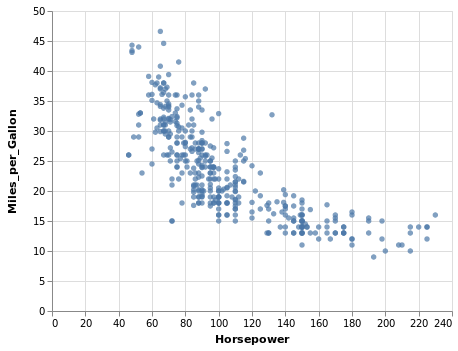

In [7]:
alt.Chart(df).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
)

In [ ]:
# chart.save('chart.png', scale_factor=2.0)
# chart.save('chart.svg')
# chart.save('chart.json')
# chart.save('chart.html')

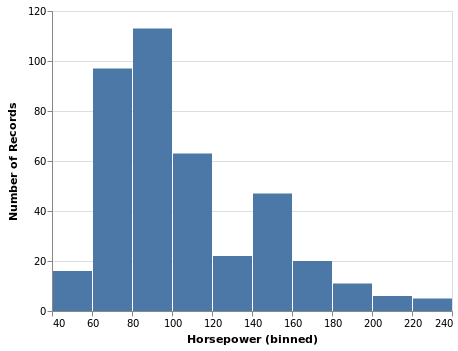

In [8]:
#bins = alt.Bin(maxbins=15)

alt.Chart(df).mark_bar().encode(
    alt.X('Horsepower', bin=True),
    y='count()'
)

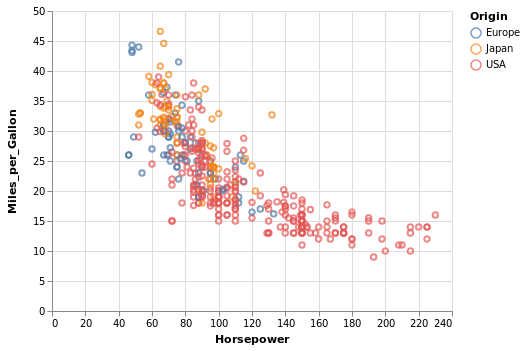

In [9]:
alt.Chart(df).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
)

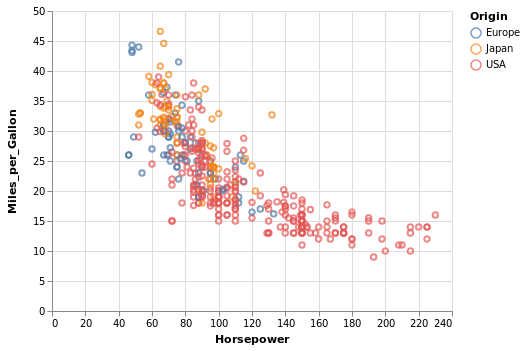

In [10]:
alt.Chart(df).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
)

# This is where the magic begins!
<br>

## Two steps

1. ### Define an *interactive tool*
2. ### Apply the *interactive tool*
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

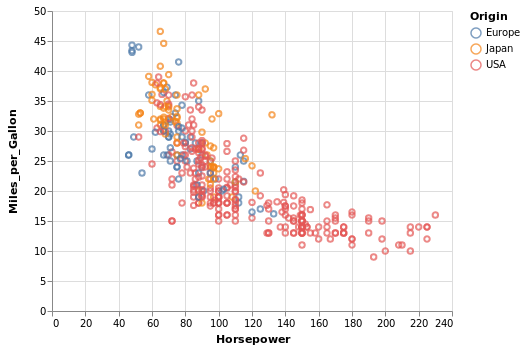

In [11]:
scales = alt.selection_interval(bind='scales')

alt.Chart(df).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).add_selection(
    scales
)

## For the above example, it can be shortened:
    
     
    

In [ ]:
alt.Chart(df).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

-----
# Get your charts talking
<br>

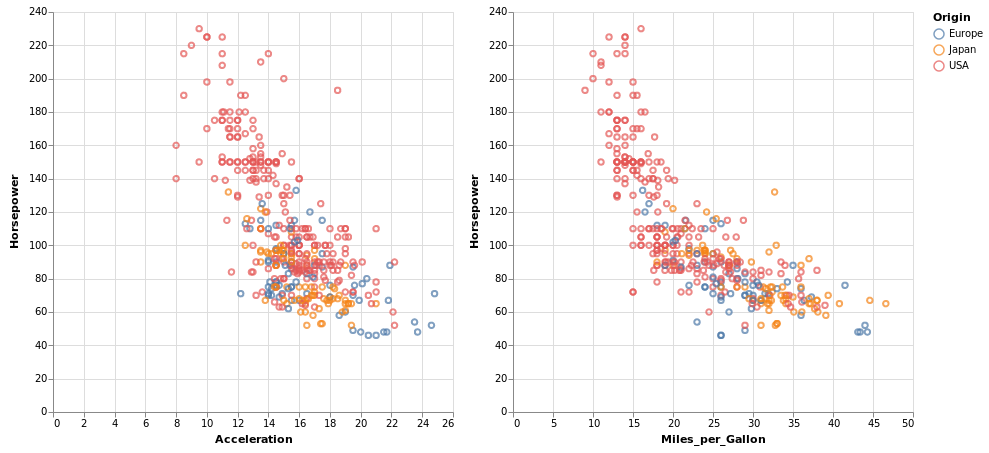

In [13]:
brush = alt.selection_interval(encodings=['x'])

#brush = alt.selection_interval()

chart = alt.Chart(df).mark_point().encode(
    y='Horsepower',
    color=alt.condition(brush, 'Origin', alt.value('lightgray')
    )
).properties(
    width=400,
    height=400
).add_selection(
    brush
)
chart.encode(x='Acceleration') | chart.encode(x='Miles_per_Gallon')

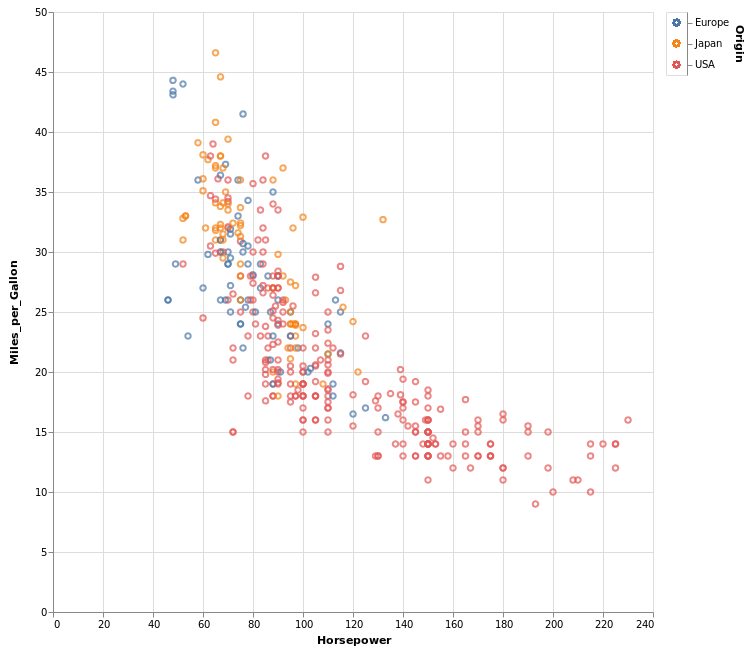

In [14]:
selection = alt.selection_multi(fields=['Origin'])
color = alt.condition(selection,
                      alt.Color('Origin:N', legend=None),
                      alt.value('lightgray'))

scatter = alt.Chart(df).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=color,
    tooltip='Name:N'
).properties(
    width=600,
    height=600)

legend = alt.Chart(df).mark_point().encode(
    y=alt.Y('Origin:N', axis=alt.Axis(orient='right')),
    color=color
).add_selection(
    selection
)

scatter | legend

-----
# Some more cool examples
<br>

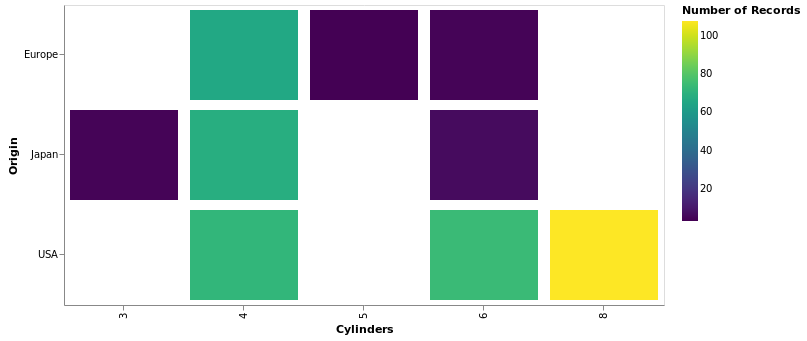

In [15]:
selector = alt.selection_interval()

alt.Chart(df).mark_rect().encode(
        x="Cylinders:O",
        y="Origin:N",
        color=alt.condition(selector, 'count()', alt.value('lightgray'))
    ).properties(
        width=600,
        height=300
    ).add_selection(
        selector
    )

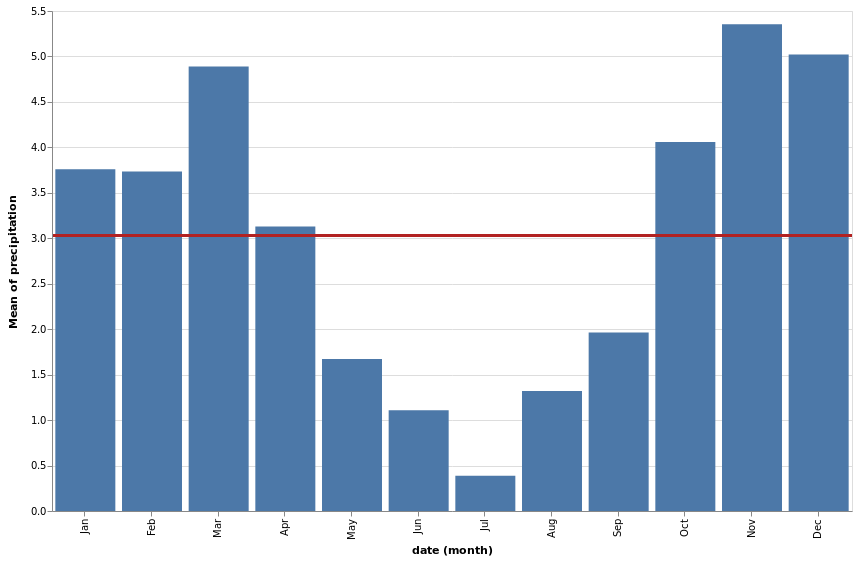

In [16]:
weather = data.seattle_weather.url
brush = alt.selection(type='interval', encodings=['x'])

bars = alt.Chart().mark_bar().encode(
    x='month(date):O',
    y='mean(precipitation):Q',
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7))
).properties(
        width=800,
        height=500
).add_selection(
    brush
)

line = alt.Chart().mark_rule(color='firebrick').encode(
    y='mean(precipitation):Q',
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

alt.layer(bars, line, data=weather)

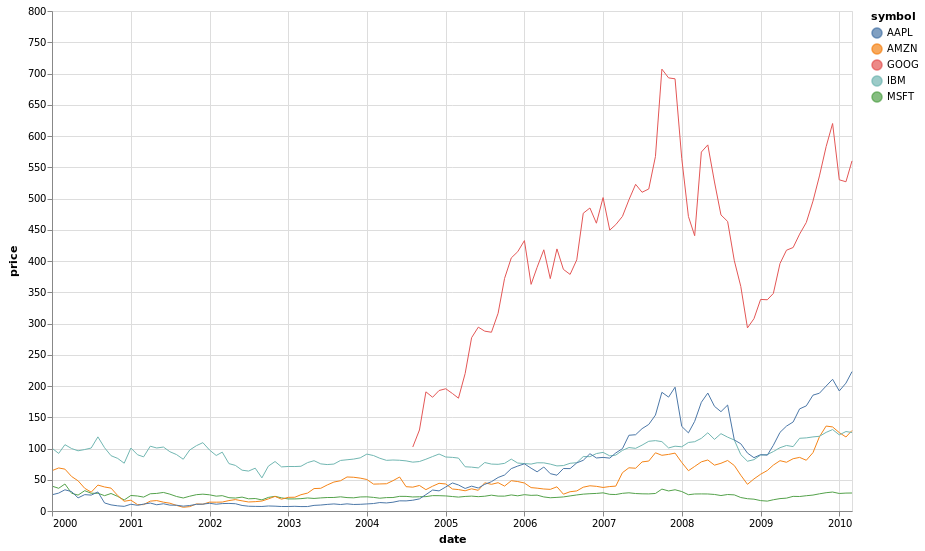

In [17]:
stocks = data.stocks.url

highlight = alt.selection(type='single', on='mouseover',
                          fields=['symbol'], nearest=True)

base = alt.Chart(stocks).encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=800,
    height=500
)

lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1), alt.value(3))
)

points + lines

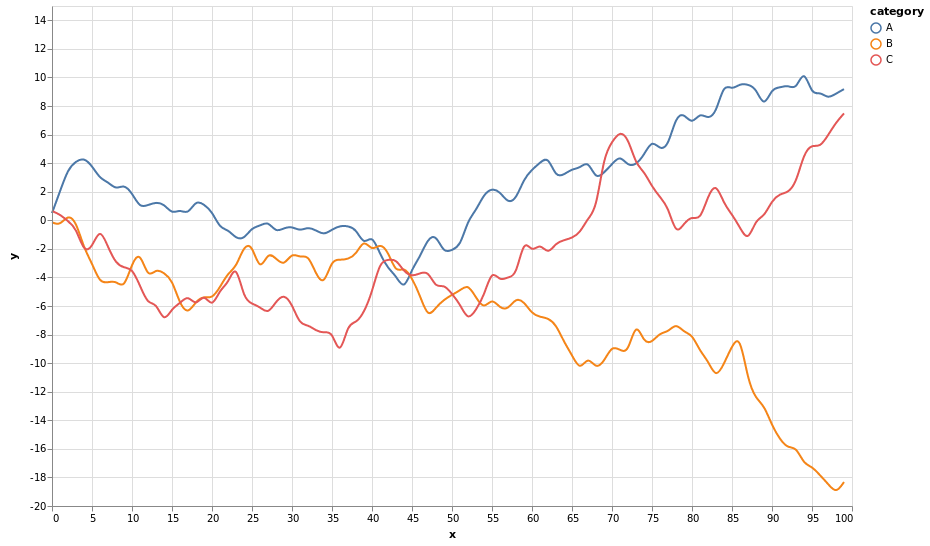

In [18]:
# Create data
np.random.seed(42)
data = pd.DataFrame(np.cumsum(np.random.randn(100, 3), 0).round(2),
                    columns=['A', 'B', 'C'], index=pd.RangeIndex(100, name='x'))
data = data.reset_index().melt('x', var_name='category', value_name='y')


# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['x'], empty='none')

# The basic line
line = alt.Chart().mark_line(interpolate='basis').encode(
    x='x:Q',
    y='y:Q',
    color='category:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart().mark_point().encode(
    x='x:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'y:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='x:Q',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(line, selectors, points, rules, text,
          data=data, width=800, height=500)

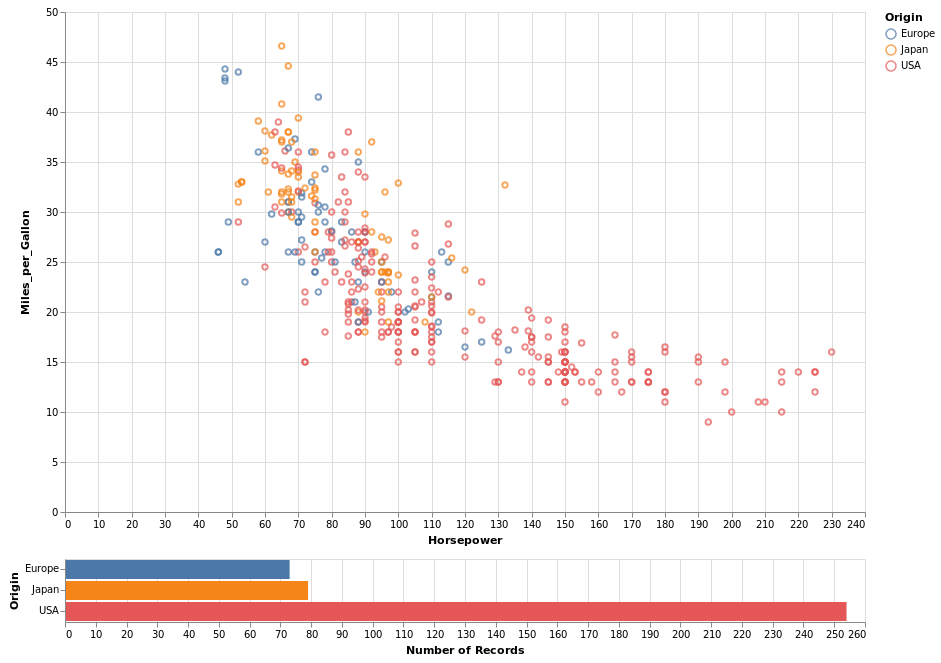

In [19]:
brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
    
).add_selection(
    brush
).properties(
    width=800,
    height=500)

bars = alt.Chart().mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(
    brush
).properties(
    width=800,
    )

alt.vconcat(points, bars, data=df)

In [20]:
def make_example(selector):
    return alt.Chart(df).mark_rect().encode(
        x="Cylinders:O",
        y="Origin:N",
        color=alt.condition(selector, 'count()', alt.value('lightgray'))
    ).properties(
        width=500,
        height=300
    ).add_selection(
        selector
    )

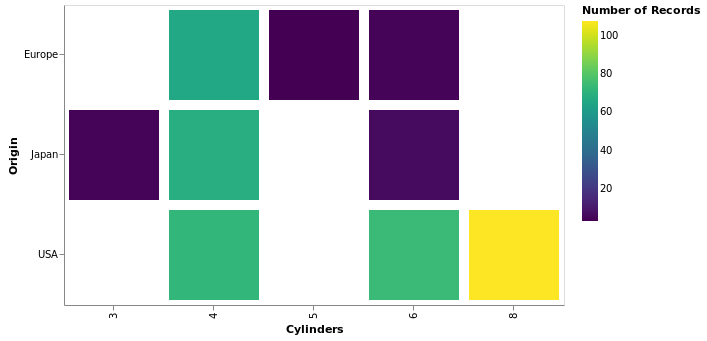

In [21]:
multi = alt.selection_multi()
make_example(multi)

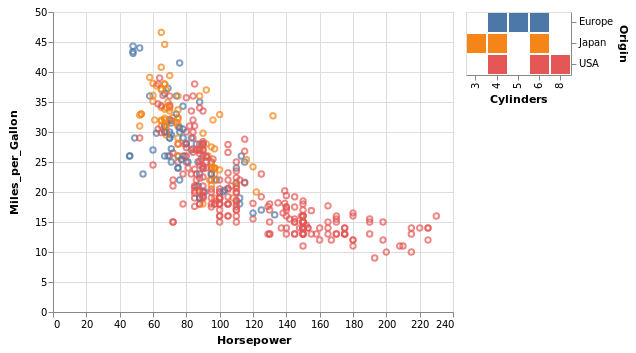

In [22]:
selection = alt.selection_multi(fields=['Origin', 'Cylinders'])
color = alt.condition(selection,
                      alt.Color('Origin:N', legend=None),
                      alt.value('lightgray'))

scatter = alt.Chart(df).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=color,
    tooltip='Name:N'
)

legend = alt.Chart(df).mark_rect().encode(
    y=alt.Y('Origin:N', axis=alt.Axis(orient='right')),
    x='Cylinders:O',
    color=color
).add_selection(
    selection
)

scatter | legend

## When to use?
* EDA
* Blog posts
* To show off


## When not to use?
* Quick and dirty visuals
* When it doesn't have the capacity to do the job
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Try It Out

### https://altair-viz.github.io
---
### **Lab:**      conda install -c conda-forge altair vega_datasets  
### **Notebook:** conda install -c conda-forge altair vega_datasets vega
---
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [ ]:
## Some Key Grammar

`chart` instantiates a visual plot. It is the most similar to what we have seen thus
with matplotlib.
* `alt.`**Chart(**
  * (Similar to `plt.plot()`)
  * Input data here. If pandas DataFrame, dtypes automatically known!

`mark_*` denotes the type of plot. Bar. Scatter. Barh. Line. Circle. Rectangle.

* `alt.Chart(df).`**mark_point(** 
  *  (We will go with a scatter plot on this one)

`encode(` - this is the heart of our plot. Set `xvalues`, `yvalues`, `color`, `size`

* `alt.Chart(df).mark_point()`**.encode(**

More we'll get to in a little bit